In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

ModuleNotFoundError: No module named 'pandas'

In [2]:
trade_df = pd.read_csv(Path.cwd() / 'src' / 'trading_log.csv')

average_df = trade_df.groupby(['Threads', 'Buyers', 'Sellers']).mean().reset_index()
average_df.sort_values(['NumberOfTrades', 'Threads'], ascending=True, inplace=True)

average_df['Speedup'] = average_df.groupby('NumberOfTrades')['CPUtime'].transform(lambda x: x.iloc[0] / x)

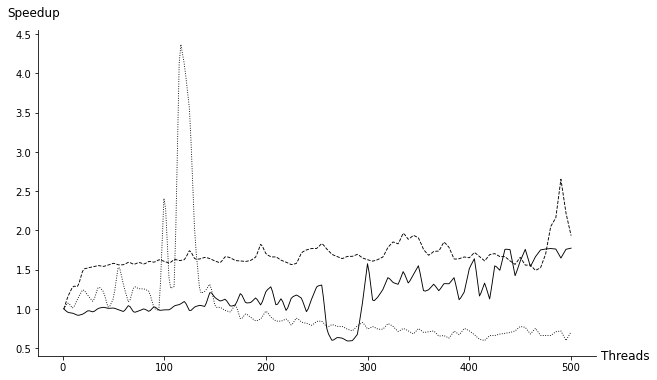

In [32]:

line_styles = {20000: ':', 200000: '--', 2000000: '-'}

plt.figure(figsize=(10, 6))

# Plot Speedup vs Threads for each group of NumberOfTrades
for number_of_trades, group in average_df.groupby('NumberOfTrades'):
    # Interpolate the data points
    threads_smooth = np.linspace(group['Threads'].min(), group['Threads'].max(), 300)
    speedup_smooth = np.interp(threads_smooth, group['Threads'], group['Speedup'])
    
    plt.plot(threads_smooth, speedup_smooth, line_styles[number_of_trades], color='black', linewidth=0.9, label=f'NumberOfTrades: {number_of_trades}')

ticklabelpad = mpl.rcParams['xtick.major.pad']

# Remove the top and right borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.annotate('Threads', xy=(1,0), xytext=(5, -ticklabelpad + 10), ha='left', va='top',
            xycoords='axes fraction', textcoords='offset points', fontsize=12)

ax.annotate('Speedup', xy=(0,1), xytext=(-ticklabelpad + 25, 10), ha='right', va='bottom',
            xycoords='axes fraction', textcoords='offset points', fontsize=12)


plt.show()